In [7]:
import onnxruntime as rt
import cv2
import numpy as np
from PIL import Image, ImageFilter
sess = rt.InferenceSession("./model/model.onnx")

In [8]:
print("input name='{}' and shape={}".format(
    sess.get_inputs()[0].name, sess.get_inputs()[0].shape))
print("output name='{}' and shape={}".format(
    sess.get_outputs()[0].name, sess.get_outputs()[0].shape))

input name='data' and shape=['None', 3, 224, 224]
output name='classLabel' and shape=['None', 1]


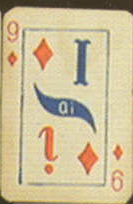

array([['9d']], dtype=object)

In [14]:
testimgsrc = './test.png'
im = Image.open(testimgsrc)
display(im)

small_image = cv2.imread(testimgsrc)

width = 224
height = 224
dim = (width, height)
# resize image

resized = cv2.resize(small_image, (224, 224), interpolation = cv2.INTER_AREA)
resized.shape
X = np.asarray(resized)
X = X.transpose(2,0,1)
X = X.reshape(1,3,224,224)

input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

from sklearn.metrics import confusion_matrix

pred_onx = sess.run([label_name], {input_name: X.astype(np.float32)})[0]
pred_onx